In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# %matplotlib inline


In [2]:
df = pd.read_excel('df_transf12_full_outliers_corrected.xlsx')

In [3]:
df = df[(df['code_from'] != 515) | (df['code_to'] != 515)]
df = df[df['transfer_fee']>0]

In [4]:
display(df.columns.to_list())

['player_name',
 'player_url',
 'player_id',
 'age',
 'nationality',
 'comunitario',
 'extranjero',
 'position',
 'transfer_fee',
 'season',
 'season_part',
 'code_from',
 'code_to',
 'club_from',
 'club_to',
 'club_nationality_from',
 'club_nationality_to',
 'market_value',
 'altura',
 'posicion',
 'demarcacion',
 'demarcacion_sec',
 'pie',
 'agente',
 'Internacional_pj_ant',
 'Local_pj_ant',
 'Internacional_Goals_ant',
 'Local_Goals_ant',
 'Internacional_Assists_ant',
 'Local_Assists_ant',
 'Internacional_Own goals_ant',
 'Local_Own goals_ant',
 'Internacional_Subbed In_ant',
 'Local_Subbed In_ant',
 'Internacional_Subbed out_ant',
 'Local_Subbed out_ant',
 'Internacional_Yellow Cards_ant',
 'Local_Yellow Cards_ant',
 'Internacional_Double yellow_ant',
 'Local_Double yellow_ant',
 'Internacional_Red Cards_ant',
 'Local_Red Cards_ant',
 'Internacional_Penalty Kicks_ant',
 'Local_Penalty Kicks_ant',
 'Internacional_Minutes played_ant',
 'Local_Minutes played_ant',
 'Club_playing_ant',


In [5]:
display(df)

,player_name,player_url,player_id,age,nationality,comunitario,extranjero,position,transfer_fee,season,...,puntos_to,partidos_jugados_to,goles_favor_to,goles_contra_to,valor_plantel_to,mean_plantel_to,partidos_ganados_to,partidos_empatados_to,partidos_perdidos_to,nationality_to
21,Leonardo Flores,/leonardo-flores/profil/spieler/569423,569423,24,['Argentina'],0,0,Lateral derecho,178000,2021,...,27,25,20,25,47050000.0,663000.0,5,12,8,Argentina
27,Martín Payero,/martin-payero/profil/spieler/555820,555820,22,"['Argentina', 'Italia']",1,0,Mediocentro,6750000,2021,...,64,46,55,53,59050000.0,1440000.0,18,10,18,Inglaterra
33,Norberto Briasco,/norberto-briasco/profil/spieler/457218,457218,25,"['Armenia', 'Argentina']",0,0,Extremo derecho,2890000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
34,Juan Ramírez,/juan-ramirez/profil/spieler/190756,190756,28,['Argentina'],0,0,Mediocentro,2530000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
35,Luis Advíncula,/luis-advincula/profil/spieler/103890,103890,31,"['Perú', 'España']",1,1,Lateral derecho,2200000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Matías Reali,/matias-reali/profil/spieler/984692,984692,26,['Argentina'],0,0,Extremo derecho,1680000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1479,Facundo Bruera,/facundo-bruera/profil/spieler/538880,538880,25,"['Argentina', 'Italia']",1,0,Delantero centro,1100000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1480,Nicolás Tripichio,/nicolas-tripichio/profil/spieler/275614,275614,28,['Argentina'],0,0,Lateral derecho,548000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1484,Agustín Giay,/agustin-giay/profil/spieler/849582,849582,20,['Argentina'],0,0,Lateral derecho,7000000,2024,...,73,38,60,33,120500000.0,2870000.0,22,7,9,Brasil


In [6]:
df[df['transfer_fee']>0].groupby(["club_nationality_to"])['age'].count()

club_nationality_to
Alemania                    4
Arabia Saudita              2
Argentina                 291
Austria                     1
Brasil                     28
Bulgaria                    1
Bélgica                     7
Chile                       6
Chipre                      2
Colombia                    1
Ecuador                     1
Emiratos Árabes Unidos      2
Escocia                     1
España                     10
Estados Unidos             20
Francia                     1
Grecia                      3
Hungría                     1
Inglaterra                 11
Israel                      1
Italia                     10
México                     24
Países Bajos                1
Portugal                    7
Rusia                      12
Sudáfrica                   1
Suiza                       1
Turquía                     1
Uruguay                     3
Name: age, dtype: int64

In [7]:
df[df['club_nationality_to']=='Argentina'].groupby(["club_to"])['transfer_fee'].sum()

club_to
AA Argentinos Juniors                  12439000
Arsenal FC                               921000
CA Banfield                             4531000
CA Belgrano                             7798000
CA Boca Juniors                        46761000
CA Central Córdoba (SdE)                4184000
CA Chacarita Juniors                     460000
CA Colón                                2775000
CA Huracán                              7076000
CA Independiente                       13401000
CA Lanús                               11678000
CA Newell's Old Boys                   11953000
CA Platense                             2087000
CA River Plate                         75932000
CA Rosario Central                     14229000
CA San Lorenzo de Almagro               8921000
CA San Martín (Tucumán)                  232000
CA Sarmiento (Junín)                     709000
CA Talleres                            23628000
CA Tigre                               12545000
CA Unión (Santa Fe)             

In [8]:
df[df['club_nationality_from']=='Argentina'].groupby(["club_from"])['transfer_fee'].sum()

club_from
AA Argentinos Juniors                   46053000
AA Argentinos Juniors II                  703000
AA Estudiantes (Río Cuarto)              1371000
AMSD Atlético de Rafaela                 2709000
Arsenal FC                               1296000
CA Aldosivi                               933000
CA All Boys                               451000
CA Atlanta                                728000
CA Banfield                             27808000
CA Belgrano                             14930000
CA Boca Juniors                        100629000
CA Boca Juniors II                        875000
CA Central Córdoba (SdE)                 9184000
CA Colón                                 3292000
CA Defensores de Belgrano                 306000
CA Estudiantes                            654000
CA Gimnasia y Esgrima (Jujuy)             436000
CA Gimnasia y Esgrima (Mendoza)           592000
CA Huracán                              19162000
CA Independiente                        19256000
CA Lanús  

In [9]:
display(df)

,player_name,player_url,player_id,age,nationality,comunitario,extranjero,position,transfer_fee,season,...,puntos_to,partidos_jugados_to,goles_favor_to,goles_contra_to,valor_plantel_to,mean_plantel_to,partidos_ganados_to,partidos_empatados_to,partidos_perdidos_to,nationality_to
21,Leonardo Flores,/leonardo-flores/profil/spieler/569423,569423,24,['Argentina'],0,0,Lateral derecho,178000,2021,...,27,25,20,25,47050000.0,663000.0,5,12,8,Argentina
27,Martín Payero,/martin-payero/profil/spieler/555820,555820,22,"['Argentina', 'Italia']",1,0,Mediocentro,6750000,2021,...,64,46,55,53,59050000.0,1440000.0,18,10,18,Inglaterra
33,Norberto Briasco,/norberto-briasco/profil/spieler/457218,457218,25,"['Armenia', 'Argentina']",0,0,Extremo derecho,2890000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
34,Juan Ramírez,/juan-ramirez/profil/spieler/190756,190756,28,['Argentina'],0,0,Mediocentro,2530000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
35,Luis Advíncula,/luis-advincula/profil/spieler/103890,103890,31,"['Perú', 'España']",1,1,Lateral derecho,2200000,2021,...,41,25,35,19,144000000.0,2530000.0,11,8,6,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,Matías Reali,/matias-reali/profil/spieler/984692,984692,26,['Argentina'],0,0,Extremo derecho,1680000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1479,Facundo Bruera,/facundo-bruera/profil/spieler/538880,538880,25,"['Argentina', 'Italia']",1,0,Delantero centro,1100000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1480,Nicolás Tripichio,/nicolas-tripichio/profil/spieler/275614,275614,28,['Argentina'],0,0,Lateral derecho,548000,2024,...,29,27,20,26,34180000.0,814000.0,7,8,12,Argentina
1484,Agustín Giay,/agustin-giay/profil/spieler/849582,849582,20,['Argentina'],0,0,Lateral derecho,7000000,2024,...,73,38,60,33,120500000.0,2870000.0,22,7,9,Brasil


In [10]:
df[['carg', 'varg', 'c5g', 'v5g', 'cmay', 'vmay']].sum()


carg    291
varg    330
c5g      36
v5g      12
cmay    136
vmay     42
dtype: int64

In [11]:
len(df)

454

In [14]:
# Importar las librerías necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import numpy as np

# 1. Filtrar por clubes argentinos para ventas (club_from)
df_arg_from = df[df['club_nationality_from'] == 'Argentina']

# Codificar division_from (Primera categoría = 1, Segunda categoría = 2, NaN = 0)
df_arg_from['division_from'] = df_arg_from['division_from'].map({
    'Primera categoría': 1,
    'Segunda categoría': 2
}).fillna(3)  # Reemplazar NaN con 0

# Agrupar por club_from (ventas)
ventas_agg = df_arg_from.groupby('club_from').agg({
    'transfer_fee': 'sum',  # Ingresos por transferencias
    'player_id': 'count',   # Cantidad de jugadores vendidos
    'market_value': 'sum', # Valor de mercado promedio de los jugadores vendidos
    'age': 'mean',          # Edad promedio de los jugadores vendidos
    
    # Columnas relevantes del club como vendedor
    'league_position_from': 'mean',  # Posición promedio en la liga
    'puntos_from': 'sum',           # Promedio de puntos por temporada
    'goles_favor_from': 'sum',      # Goles a favor promedio por temporada
    'goles_contra_from': 'sum',     # Goles en contra promedio por temporada
    'valor_plantel_from': 'sum',    # Valor del plantel promedio
    'mean_plantel_from': 'mean',     # Valor promedio por jugador del plantel
    'partidos_jugados_from': 'sum', # Partidos jugados promedio por temporada
    'division_from': 'max'           # Categoría de división (Primera = 1, Segunda = 2)
}).rename(columns={
    'transfer_fee': 'ingresos_transferencias',
    'player_id': 'jugadores_vendidos',
    'market_value': 'valor_vendido',
    'age': 'edad_vendida',
    'league_position_from': 'posicion_liga',
    'puntos_from': 'puntos',
    'goles_favor_from': 'goles_favor',
    'goles_contra_from': 'goles_contra',
    'valor_plantel_from': 'valor_plantel',
    'mean_plantel_from': 'valor_medio_plantel',
    'partidos_jugados_from': 'partidos_jugados'
}).reset_index().rename(columns={'club_from': 'club'})  # Renombramos club_from a club

# 2. Filtrar por clubes argentinos para compras (club_to)
df_arg_to = df[df['club_nationality_to'] == 'Argentina']

# Codificar division_to (Primera categoría = 1, Segunda categoría = 2)
df_arg_to['division_to'] = df_arg_to['division_to'].map({
    'Primera categoría': 1,
    'Segunda categoría': 2
}).fillna(3)

# Agrupar por club_to (compras)
compras_agg = df_arg_to.groupby('club_to').agg({
    'transfer_fee': 'sum',  # Gastos por transferencias
    'player_id': 'count',   # Cantidad de jugadores comprados
    'market_value': 'sum', # Valor de mercado promedio de los jugadores comprados
    'age': 'mean',          # Edad promedio de los jugadores comprados
    'division_to': 'max'    # Categoría de división (Primera = 1, Segunda = 2)
}).rename(columns={
    'transfer_fee': 'gastos_transferencias',
    'player_id': 'jugadores_comprados',
    'market_value': 'valor_comprado',
    'age': 'edad_comprada'
}).reset_index().rename(columns={'club_to': 'club'})  # Renombramos club_to a club

# 3. Concatenar ventas y compras por la columna 'club'
club_agg = pd.merge(ventas_agg, compras_agg, how='outer', on='club')

# Rellenar posibles valores NaN (en caso de que un club solo haya comprado o vendido)
club_agg.fillna(0, inplace=True)

club_agg = club_agg[(club_agg.division_from==1) | (club_agg.division_to==1)].drop(club_agg[club_agg['club']=='CA Patronato'].index)


C:\Users\Terminal-NTB\AppData\Local\Temp\ipykernel_25676\3093270308.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arg_from['division_from'] = df_arg_from['division_from'].map({
C:\Users\Terminal-NTB\AppData\Local\Temp\ipykernel_25676\3093270308.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_arg_to['division_to'] = df_arg_to['division_to'].map({


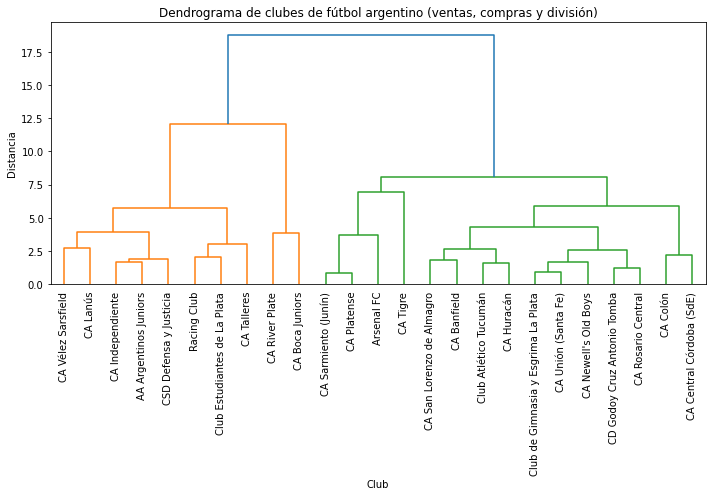

In [15]:
# 4. Preprocesamiento de los datos (normalización)
columns_to_scale = [
    'ingresos_transferencias', 'jugadores_vendidos', 'valor_vendido', 'edad_vendida',
    'posicion_liga', 'puntos', 'goles_favor', 'goles_contra', 'valor_plantel',
    'valor_medio_plantel', 'partidos_jugados', 'division_from',  # Agregamos division_from
    'gastos_transferencias', 'jugadores_comprados', 'valor_comprado', 'edad_comprada',
    'division_to'  # Agregamos division_to
]

scaler = StandardScaler()
club_agg_scaled = scaler.fit_transform(club_agg[columns_to_scale])

# 5. Aplicar clustering jerárquico aglomerativo
linked = linkage(club_agg_scaled, method='ward')

# 6. Dibujar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=club_agg['club'].values,  # Etiquetas de los clubes
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de clubes de fútbol argentino (ventas, compras y división)')
plt.xlabel('Club')
plt.ylabel('Distancia')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [16]:
display(club_agg)

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,valor_medio_plantel,partidos_jugados,division_from,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to
0,AA Argentinos Juniors,46053000.0,15.0,47450000.0,25.133333,11.466667,576.0,449.0,360.0,5.037500e+08,7.792667e+05,401.0,1.0,12439000.0,9.0,10900000.0,24.888889,1.0
4,Arsenal FC,1296000.0,2.0,2300000.0,20.500000,28.000000,44.0,36.0,68.0,2.060000e+07,2.860000e+05,54.0,1.0,921000.0,2.0,3200000.0,21.500000,1.0
8,CA Banfield,27808000.0,11.0,34175000.0,24.636364,22.818182,315.0,238.0,344.0,2.913900e+08,5.360909e+05,295.0,1.0,4531000.0,8.0,6650000.0,26.750000,1.0
10,CA Boca Juniors,100629000.0,22.0,102875000.0,24.409091,5.090909,937.0,740.0,474.0,2.789190e+09,2.239545e+06,572.0,1.0,46761000.0,20.0,58425000.0,26.250000,1.0
12,CA Central Córdoba (SdE),9184000.0,5.0,5000000.0,27.000000,20.000000,152.0,138.0,170.0,7.201000e+07,3.178000e+05,133.0,1.0,4184000.0,6.0,2475000.0,27.000000,1.0
14,CA Colón,3292000.0,6.0,9200000.0,30.333333,19.666667,186.0,140.0,200.0,2.247600e+08,8.613333e+05,158.0,1.0,2775000.0,4.0,4125000.0,26.250000,1.0
19,CA Huracán,19162000.0,9.0,31500000.0,25.222222,14.666667,316.0,226.0,226.0,1.982200e+08,4.427778e+05,239.0,1.0,7076000.0,12.0,15400000.0,26.916667,1.0
20,CA Independiente,19256000.0,14.0,40950000.0,26.857143,14.071429,487.0,370.0,375.0,6.694600e+08,9.785714e+05,368.0,1.0,13401000.0,13.0,16100000.0,24.846154,1.0
21,CA Lanús,55345000.0,15.0,40025000.0,23.133333,14.866667,504.0,478.0,530.0,6.570600e+08,9.862000e+05,399.0,1.0,11678000.0,9.0,16475000.0,27.000000,1.0
23,CA Newell's Old Boys,19510000.0,6.0,25100000.0,22.666667,17.166667,201.0,142.0,164.0,1.644800e+08,6.203333e+05,162.0,1.0,11953000.0,10.0,15200000.0,24.800000,1.0


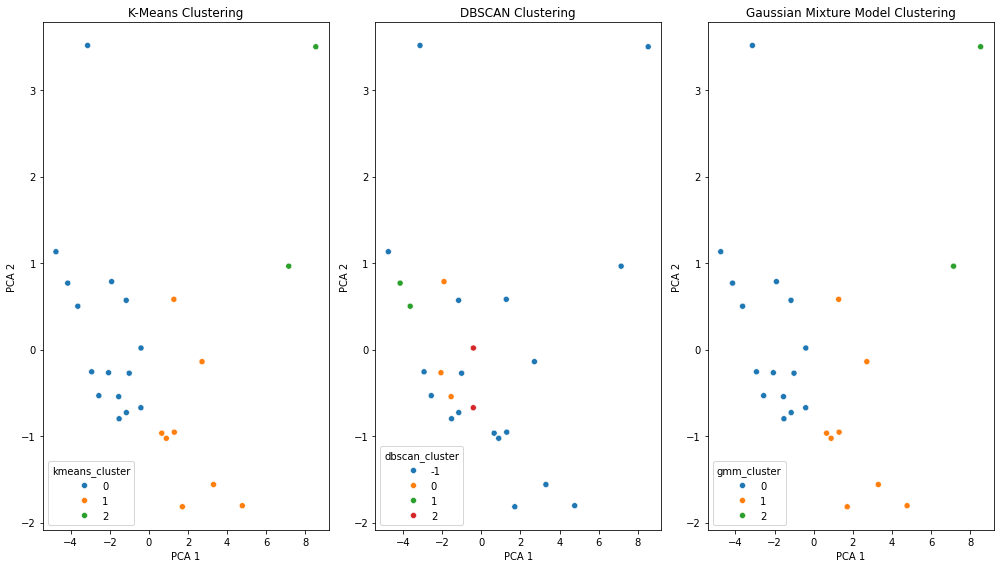

In [17]:
# Importar librerías adicionales para clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import seaborn as sns

# 1. Aplicar K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Elegimos 4 clusters como ejemplo
club_agg['kmeans_cluster'] = kmeans.fit_predict(club_agg_scaled)

# 2. Aplicar DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=2)  # Ajustar parámetros de eps y min_samples según los datos
club_agg['dbscan_cluster'] = dbscan.fit_predict(club_agg_scaled)

# 3. Aplicar Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=3, random_state=42)  # Elegimos 4 componentes como ejemplo
club_agg['gmm_cluster'] = gmm.fit_predict(club_agg_scaled)

# 4. Reducir dimensiones a 2D para visualizar clusters (usamos PCA)
pca = PCA(n_components=2)
club_agg_pca = pca.fit_transform(club_agg_scaled)

# Crear un DataFrame para facilitar la visualización
club_agg['pca_1'] = club_agg_pca[:, 0]
club_agg['pca_2'] = club_agg_pca[:, 1]

# 5. Visualización de los clusters usando PCA
plt.figure(figsize=(14, 8))

# Gráfico de K-Means
plt.subplot(1, 3, 1)
sns.scatterplot(x='pca_1', y='pca_2', hue='kmeans_cluster', data=club_agg, palette='tab10')
plt.title('K-Means Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico de DBSCAN
plt.subplot(1, 3, 2)
sns.scatterplot(x='pca_1', y='pca_2', hue='dbscan_cluster', data=club_agg, palette='tab10')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Gráfico de GMM
plt.subplot(1, 3, 3)
sns.scatterplot(x='pca_1', y='pca_2', hue='gmm_cluster', data=club_agg, palette='tab10')
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

plt.tight_layout()
plt.show()


In [18]:
grupos = len(club_agg['kmeans_cluster'].unique())
for i in range(grupos):
    subset = club_agg[club_agg['kmeans_cluster']==i]
    display(subset)
    display(subset['club'].to_list())

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
4,Arsenal FC,1296000.0,2.0,2300000.0,20.500000,28.000000,44.0,36.0,68.0,20600000.0,...,921000.0,2.0,3200000.0,21.500000,1.0,0,-1,0,-4.751450,1.131269
8,CA Banfield,27808000.0,11.0,34175000.0,24.636364,22.818182,315.0,238.0,344.0,291390000.0,...,4531000.0,8.0,6650000.0,26.750000,1.0,0,-1,0,-1.151246,-0.727657
12,CA Central Córdoba (SdE),9184000.0,5.0,5000000.0,27.000000,20.000000,152.0,138.0,170.0,72010000.0,...,4184000.0,6.0,2475000.0,27.000000,1.0,0,-1,0,-2.925847,-0.256635
14,CA Colón,3292000.0,6.0,9200000.0,30.333333,19.666667,186.0,140.0,200.0,224760000.0,...,2775000.0,4.0,4125000.0,26.250000,1.0,0,-1,0,-2.557145,-0.532016
19,CA Huracán,19162000.0,9.0,31500000.0,25.222222,14.666667,316.0,226.0,226.0,198220000.0,...,7076000.0,12.0,15400000.0,26.916667,1.0,0,-1,0,-1.006257,-0.272710
23,CA Newell's Old Boys,19510000.0,6.0,25100000.0,22.666667,17.166667,201.0,142.0,164.0,164480000.0,...,11953000.0,10.0,15200000.0,24.800000,1.0,0,0,0,-1.905283,0.785771
26,CA Platense,4861000.0,3.0,2750000.0,23.333333,17.666667,96.0,98.0,101.0,23380000.0,...,2087000.0,4.0,5800000.0,25.000000,1.0,0,1,0,-3.633971,0.501142
28,CA Rosario Central,30859000.0,10.0,33250000.0,22.500000,15.200000,350.0,321.0,322.0,235540000.0,...,14229000.0,13.0,24650000.0,24.076923,1.0,0,2,0,-0.403121,0.018199
29,CA San Lorenzo de Almagro,24520000.0,8.0,27075000.0,23.875000,20.625000,240.0,182.0,226.0,475820000.0,...,8921000.0,10.0,14300000.0,27.300000,1.0,0,-1,0,-1.159784,0.569203
33,CA Sarmiento (Junín),3450000.0,2.0,3275000.0,23.000000,19.000000,60.0,46.0,52.0,23000000.0,...,709000.0,2.0,750000.0,24.500000,1.0,0,1,0,-4.148990,0.768204


['Arsenal FC',
 'CA Banfield',
 'CA Central Córdoba (SdE)',
 'CA Colón',
 'CA Huracán',
 "CA Newell's Old Boys",
 'CA Platense',
 'CA Rosario Central',
 'CA San Lorenzo de Almagro',
 'CA Sarmiento (Junín)',
 'CA Tigre',
 'CA Unión (Santa Fe)',
 'CD Godoy Cruz Antonio Tomba',
 'Club Atlético Tucumán',
 'Club de Gimnasia y Esgrima La Plata']

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
0,AA Argentinos Juniors,46053000.0,15.0,47450000.0,25.133333,11.466667,576.0,449.0,360.0,503750000.0,...,12439000.0,9.0,10900000.0,24.888889,1.0,1,-1,1,0.890186,-1.025010
20,CA Independiente,19256000.0,14.0,40950000.0,26.857143,14.071429,487.0,370.0,375.0,669460000.0,...,13401000.0,13.0,16100000.0,24.846154,1.0,1,-1,1,0.657582,-0.965661
21,CA Lanús,55345000.0,15.0,40025000.0,23.133333,14.866667,504.0,478.0,530.0,657060000.0,...,11678000.0,9.0,16475000.0,27.000000,1.0,1,-1,1,1.298643,-0.954049
34,CA Talleres,66227000.0,22.0,78000000.0,24.363636,4.272727,1012.0,828.0,556.0,892380000.0,...,23628000.0,22.0,32900000.0,23.772727,1.0,1,-1,1,4.774568,-1.803517
38,CA Vélez Sarsfield,69432000.0,13.0,68600000.0,23.538462,22.153846,378.0,350.0,357.0,706780000.0,...,20110000.0,15.0,30150000.0,25.733333,1.0,1,-1,1,1.277103,0.580907
44,CSD Defensa y Justicia,31683000.0,17.0,50100000.0,26.647059,10.000000,699.0,552.0,440.0,498120000.0,...,9525000.0,13.0,24925000.0,25.384615,1.0,1,-1,1,1.713571,-1.815802
47,Club Estudiantes de La Plata,48647000.0,19.0,58300000.0,24.473684,10.473684,726.0,667.0,614.0,784820000.0,...,23424000.0,19.0,29750000.0,24.210526,1.0,1,-1,1,3.303154,-1.559247
53,Racing Club,51035000.0,15.0,50600000.0,24.400000,9.066667,602.0,541.0,446.0,829450000.0,...,33630000.0,17.0,34975000.0,25.235294,1.0,1,-1,1,2.715976,-0.139109


['AA Argentinos Juniors',
 'CA Independiente',
 'CA Lanús',
 'CA Talleres',
 'CA Vélez Sarsfield',
 'CSD Defensa y Justicia',
 'Club Estudiantes de La Plata',
 'Racing Club']

,club,ingresos_transferencias,jugadores_vendidos,valor_vendido,edad_vendida,posicion_liga,puntos,goles_favor,goles_contra,valor_plantel,...,gastos_transferencias,jugadores_comprados,valor_comprado,edad_comprada,division_to,kmeans_cluster,dbscan_cluster,gmm_cluster,pca_1,pca_2
10,CA Boca Juniors,100629000.0,22.0,102875000.0,24.409091,5.090909,937.0,740.0,474.0,2.789190e+09,...,46761000.0,20.0,58425000.0,26.250000,1.0,2,-1,2,7.148584,0.963910
27,CA River Plate,147131000.0,17.0,129700000.0,24.294118,2.058824,913.0,805.0,345.0,2.135550e+09,...,75932000.0,23.0,95950000.0,27.086957,1.0,2,-1,2,8.532259,3.499538


['CA Boca Juniors', 'CA River Plate']

In [19]:
df_arg_from['division_from'].unique()

array([2., 1., 3.])

In [20]:
df_arg_to['division_to'].unique()

array([1, 2])